This is an example for the CartPole environment. As indicated in the documentation, to create your own custom environment you should:

   1. Create a copy of the `empty` or `cartpole` directories
   
   2. Modify the `config.json` with your own action, state, postitive and negative reward values, additional debug states, Modelica libraries, and Modelica model names.
   
   3. Edit the `env.py` class definition with your own class name and redeclare any methods that you might need (i.e. with post-processing on the state or action values in `.step()`
   
   4. Edit the `__init__.py` file in the new directory with the correct environment name (note that some names are reserved by the Gym package (i.e. `CartPole-v0` is a canonical example that is already registered) and class entry point. (Hint: the entry point is `modelicagym.examples:YourClassName`)
   
   5. Edit the `__init__.py` file in `modelicagym\examples` by adding an import for the new class. (i.e. `from .yourNewDirectory import *`
   
   6. Unit test your new environment (make sure all necessary methods are working) by running `test.ipynb` or similar.

In [1]:
import modelicagym # for the general modelicagym environments
import modelicagym.examples # for your custom environment
import gym
import numpy as np # for general utilities
import time
import matplotlib.pyplot as plt # to plot data at the end

In [2]:
# you must call the environment with the registered name from __init__.py
env_name = "CartPoleMo-v0" 

# making the environment. this will run an initial step and must return [True, [...]] or something is broken
env = gym.make(env_name)

C:\Users\Aisling\AppData\Roaming\Python\Python38\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
simulation_times = []
for ts in range(5):
    tic = time.time()
    print("step", ts) # so you can see how far along you are
    env.step([np.random.uniform(-0.1, 0.1)])
    toc = time.time()
    simulation_times += [toc-tic]

print("Average simulation time is:", np.average(simulation_times))

step 0
step 1
step 2
step 3
step 4
Average simulation time is: 0.7345733165740966


In [4]:
# to train an agent, it is recommended that you train with significantly more steps than this, 
# this is just a sample to show the functionality and an example workflow

# from stable_baselines3.sac.policies import MlpPolicy
# from stable_baselines3.common.vec_env import DummyVecEnv
# from stable_baselines3 import SAC

# mode = 'train'
# model_name = 'test_agent'

# if mode == 'load':
#     model = SAC.load(model_name, env=env)
# else:
#     model = SAC(MlpPolicy, env, learning_rate=10**-4, verbose=1, tensorboard_log='tensorboard_log')

#     env.reset()
#     model.learn(100, reset_num_timesteps=False)
#     model.save(model_name)

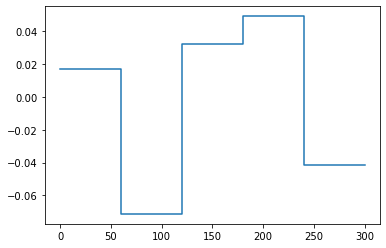

In [5]:
# plot the action variable
plt.plot(np.repeat(np.linspace(0, env.debug_data['my_time'][-1], env.nstep+1),2)[1:-1], env.debug_data['u'])

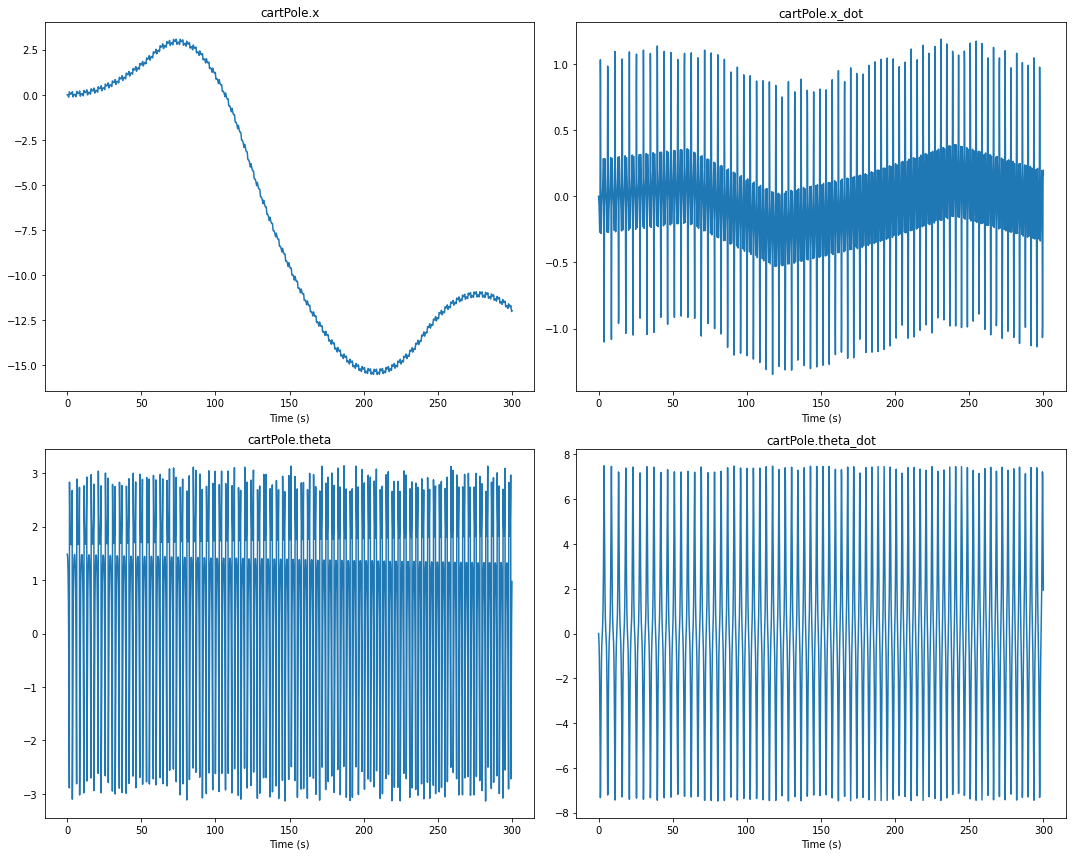

In [6]:
# plot the state variables
fig, ax = plt.subplots(int(len(env.model_output_names) / 2), 2, figsize=(15,12))
for n in range(len(env.model_output_names)):
    ax[n // 2][n % 2].plot(env.debug_data['my_time'], env.debug_data[env.model_output_names[n]])
    ax[n // 2][n % 2].set_title(env.model_output_names[n])
    ax[n // 2][n % 2].set_xlabel("Time (s)")
    
fig.tight_layout()

In [7]:
# clean up the dymola process -- otherwise you'll have a bunch of open dymola.exe processes!
env.dymola.close()

0